In [2]:
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# EECS 545:  Machine Learning
## Lecture 20:  Multidimensional Scaling, ISOMAP, Locally-Linear Embedding, Spectral Clustering
* Instructor:  **Jacob Abernethy**
* Date:  March 30, 2016

*Lecture Exposition Credit:*  Benjamin Bray & Valliappa Chockalingam

### Dimensionality Reduction  

- Many ML algorithms struggle with high-dimensional data. - The Curse of Dimensionality.

- Linear Dimensionality Reduction (Previous Lecture)
 - Assumes that the data lives close to a lower dimensional linear subspace.
 - Examples: PCA, ICA, SVD

- Nonlinear Dimensionsionality Reduction
 - More general: Works for problems where data is in some form a Low-dimensional surface embedded nonlinearly in a high-dimensional space (a "manifold.")

### Another linear method: Multidimensional Scaling (MDS)

- Given pairwise distances between data points, MDS tries to "recover" the linear (Euclidean) embedding that preserves the distances.

- Used for Data Visualization and Dimensionality Reduction

### Multidimensional Scaling Example 

- Given pairwise distances between cities in the USA, can you locate the cities? 
- In other words, can you find cooridnates of a list of cities just given the distances between them?

In [31]:
%matplotlib inline
# Adapted from http://baoilleach.blogspot.com/2014/01/convert-distance-matrix-to-2d.html

import csv
import numpy as np
import matplotlib.pyplot as plt
import random

### Input 
reader = csv.reader(open("european_city_distances.csv", "r"), delimiter=';')
data = list(reader)

dists = []
cities = []
for d in data:
    cities.append(d[0])
    dists.append(map(float , d[1:-1]))

# Distance Matrix
adist = np.array(dists)

# Normalization
amax = np.amax(adist)
adist /= amax

In [26]:
# Input illustration

print("Row for distance from " + cities[0])
print(adist[0])

for i in range(10):
    c1_ind = random.randint(0, len(adist[0]) - 1)
    c2_ind = random.randint(0, len(adist[0]) - 1)
    c1 = cities[c1_ind]
    c2 = cities[c2_ind]
    print("Distance from " + c1 + " to " + c2  + " is " + str(adist[c1_ind][c2_ind]))

Row for distance from Barcelona
[ 0.          0.44452105  0.43564302  0.30918637  0.57259796  0.43598627
  0.51125462  0.42740495  0.42812927  0.64881171  0.69554062  0.33093929
  0.14679582  0.21093173  0.87469238  0.30676033  0.24190302  0.3938389
  0.24920441  0.81828548  0.50776682  0.66221893  0.39195683  0.54173721]
Distance from Berlin to Brussels is 0.189551153387
Distance from Milan to London is 0.278648514995
Distance from Paris to Bucharest is 0.543953806324
Distance from Milan to Belgrade is 0.257532652646
Distance from Hamburg to Sofia is 0.452284957966
Distance from Stockholm to Moscow is 0.357035227041
Distance from Stockholm to Saint Petersburg is 0.200229804811
Distance from Milan to Barcelona is 0.210931727609
Distance from Kiev to Sofia is 0.296931087646
Distance from Istanbul to Dublin is 0.858163888646


In [35]:
# MDS Algorithm

from sklearn import manifold

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

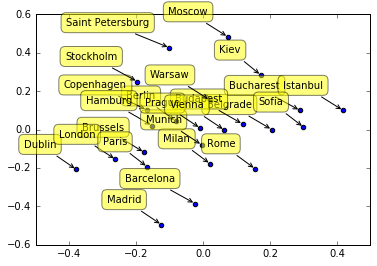

In [36]:
% matplotlib inline
# Plot of output

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

### Inner workings of MDS

An $n \times n$ matrix D is a
- Dissimilarity or Distance matrix if $(1)$ $d_{ij} \geq 0$, $(2)$ $d_{ii} = 0$, $(3)$ $d_{ij} = d_{ji}$
- Metric if in addition to $(1)(2)(3)$, it satisfies $d_{ij} \leq d_{ik} + d_{jk}$
- Euclidean Distance Matrix if $\exists p, \mathbf{x}_1, ..., \mathbf{x}_n \in \mathbb{R}^p \text{ s.t. } d_{ij} = \|\mathbf{x_i} - \mathbf{x}_j\|, \forall i, j$

### Classical Multidimensional Scaling

- Assume that the observed $n \times n$ proximity matrix D is a matrix of Euclidean distances derived from a raw $n \times q$ data matrix, $X$, which is not observed.

- Define an $n \times n$ matrix $B = XX^T$ ($= (XM)(XM)^T$ for some orthogonal matrix $M$)
- The elements of B are given by $b_{ij} = \sum \limits_{k = 1}^q x_{ik} x_{jk}$
- The squared Euclidean distances between the rows of X can be written in terms of the elements of B as $d_{ij}^2 = b_{ii} + b_{jj} + 2b_{ij}$
- Idea: If the $b_{ij}$’s could be found in terms of the $d_{ij}$’s in the equation above, then we can derive $X$ from $B$ by factoring $B$.

### Location Constraint

- To obtain $B$ from $D$, no unique solution exists unless a location constraint is
introduced. Usually, the center of the columns of $X$ are set at origin, i.e., 
$$\sum \limits_{i = 1}^n x_{ik} = 0, \forall k$$
- The above constraint implies that sum of the terms in any row of $B$ must be 0, i.e.,
$$\sum \limits_{j = 1}^n b_{ij} = \sum \limits_{j = 1}^n \sum \limits_{k = 1}^q x_{ik}x_{jk} = \sum \limits_{k = 1}^q x_{ik} \left(\sum \limits_{j = 1}^n x_{jk} \right)$$

### Obtaining $B$ from $D$ (1)

- Let T be the trace of B.
- Notice: ￼ ￼ 
 - $\sum \limits_{i = 1}^n d^2_{ij} = T + nb_{jj}$ 
 - ￼$\sum \limits_{j = 1}^n d^2_{ij} = nb_{ii} + T$
 - $\sum \limits_{i = 1}^n \sum \limits_{j = 1}^n d_{ij}^2 = 2nT$

### Obtaining $B$ from $D$ (2)

The elements of $B$ can be found from $D$ as
￼￼$b_{ij} = −\frac{1}{2} d^2_{ij} − d^2_{i\cdot} − d^2_{\cdot j} + d^2_{\cdot\cdot}$
where $d_{i \cdot}^2 = \left(\sum \limits_{j = 1}^n d^2_{ij}\right)/n$, $d^2_{\cdot j} = \left(\sum \limits_{i = 1}^n d^2_{ij}\right)/n$, $d^2_{\cdot \cdot} = \left(\sum \limits_{i = 1}^n \sum \limits_{j = 1}^n d^2_{\cdot \cdot}\right)/n^2$
￼￼

### Eigenvalue Decomposition of $B$

- $B$ can be written as $B = V \Lambda V^T$, where $\Lambda = diag[\lambda_1, ···, \lambda_n] (\lambda_1 \geq ··· \geq \lambda_n)$ is the diagonal matrix of eigenvalues of $B$ and $V = [\mathbf{v}_1, · · · , \mathbf{v}_n]$ is the corresponding matrix of normalized eigenvectors ($\mathbf{v}_i^T\mathbf{v}_i = 1$)

- Note: When $D$ arises from an $n \times q$ data matrix, the rank of $B$ is $q$ (i.e, the last $n − q$ eigenvalues are zero)

- So, B can be chosen as $B = V^*\Lambda^*V^{*^T}$ where $V^∗$ contains the first $q$ eigenvectors and $\Lambda^∗$ the first $q$ eigenvalues.

- Thus, a solution of $X$ is $X = V^∗\Lambda^{∗^{1/2}}$

### Equivalency to PCA

If the dissimilarities used are themselves Euclidean distances between the points in $\mathbb{R}^q$, then classical MDS is equivalent to applying PCA to the $q$ dimensional points. (See Mardia, Kent, and Bibby for details.)

### Non-Euclidean Dissimilarities

- When the observed proximity matrix is Euclidean, the matrix $B$ is PSD.
- On the other hand, when the observed proximity matrix is not Euclidean, the matrix $B$ is not positive-definite.   
 - Some of the eigenvalues of $B$ will be negative; correspondingly, some coordinate values will be complex numbers.
 - However, if $B$ has only a small number of small negative eigenvalues, it’s still possible to use the eigenvectors associated with the $q$ largest positive eigenvalues and Classical MDS.

### Metric Multidimensional Scaling and the Stress Criterion

- Metric MDS: A superset of classical MDS that generalizes the optimization procedure to a variety of loss functions and input matrices of known distances with weights.

- Minimizes the stress objective function $$\sum \limits_{i, j = 1}^n w_{ij} (d_{ij} - \|\mathbf{x}_i - \mathbf{x}_j\|)^2 \text{ w.r.t. } $\mathbf{x}_1, ..., \mathbf{x}_n \in \mathbb{R}^p$$ 

- Examples for $w_{ij}$ are $w_{ij} = 1$ or $w_{ij} = d_{ij}^{-\alpha}, \alpha > 0$. 

- The above problem is non-convex, but a local minimizer can be found effectively with a Majorize-Minimize algorithm.

### Non-metric and Non-linear methods

- The two MDS algorithm discussed previously are both called metric methods because they preserve the dissimilarities. There are also nonmetric methods that just try to preserve the rank ordering of the interpoint distances. 

- Now, we will be moving to non-linear dimensionality methods (ISOMAP, Locally-Linear Embedding, and Spectral Clustering). However, before that, there are some definitions and concepts to cover.

### Definition: Similarity Graph

$n \times n$ weighted adjacency matrix

$$W = \begin{bmatrix} w_{11} & . & . & . & w_{1n}\\ . & . & & & .\\ . & & . &  & .\\ . & & & . & .\\ w_{n1} & . & . & . & w_{nn}\end{bmatrix}$$

where 

- $\forall i, j, w_{ij} \geq 0, w_{ij} > 0$ iff. there is an edge between $\mathbf{x}_{i}$ and $\mathbf{x}_{j}$ ($\mathbf{x}_i$ and $\mathbf{x}_j$ are adjacent), and,
- $\forall i, j, w_{ij} = w_{ji}$ ($W$ is symmetric)

### Edges

- We can use different popular graph structures to decide which edges to use. Some of these are: 

 - $k$-Nearest Neighbor Graph: Every $\mathbf{x}_i$ is adjacent to it's $k$ nearest neighbors.
 - $\epsilon$-Ball Graph: Every $\mathbf{x}_i$ is adjacent to every $\mathbf{x}_j$ within a radius of $\epsilon$.
 - Complete Graph: Every $\mathbf{x}_i$ is adjacent to every other $\mathbf{x}_j$.

### Edge Weights

- There are different ways to assign edge weights. Two popular ones are:
 - Constant: $w_{ij} = \begin{cases} 1 & \text{ if } \mathbf{x}_i \text{ and } \mathbf{x}_j \text{ are adjacent}\\ 0 & \text{otherwise}\end{cases}$ (***Note:*** not appropriate for a Complete Graph)
 
 - Gaussian: $w_{ij} = \begin{cases} \exp{(\frac{-1}{2\sigma^2}\|\mathbf{x}_i - \mathbf{x}_j\|^2)} & \text{ if } \mathbf{x}_i \text{ and } \mathbf{x}_j \text{ are adjacent}\\ 0 & \text{otherwise}\end{cases}$ (***Note:*** not appropriate for a Complete Graph)

### ISOMAP 

- One limitation of Kernel PCA, discussed in the previous lecture, is that it does not try to exploit the intrinsic dimensionality of a sataset. 
- One method that does is called isometric feature mapping or ISOMAP.
- General Idea: Uses geodesic distance as dissimilarity measure for MDS.

### ISOMAP Algorithm 

- Input: $\mathbf{x}_1, ..., \mathbf{x}_n$
- Construct a neighborhood similarity graph. (using $k$-Nearest Neighbors).
- Form a dissimalrity matrix $D = [d_{ij}]$ where $d_{ij} =$ length of shortest path connecting $\mathbf{x}_i$ and $\mathbf{x}_j$ (using Dijkstra's or the Floyd-Warshall algorithm)
- Compute an embedding $\mathbf{y}_1, ..., \mathbf{y}_n$ from $D$ (using MDS).
- Output: $\mathbf{y}_1, ..., \mathbf{y}_n$

### Interpretation of $d_{ij}$ 

$d_{ij}$ is viewed as an approximation to the geodesic distance (shortest path distance) on the underlying data manifold.

In [278]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

"""
Based on scikits.learn example at
http://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html
"""

# load Swiss roll dataset
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

# run Isomap on the points in X with 2 dim output
n_neighbors = 10
Y = manifold.Isomap(n_neighbors, 2).fit_transform(X)

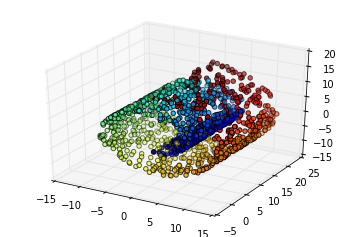

In [279]:
# 3D plot of Swiss Roll Dataset
fig = figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=color)

show()

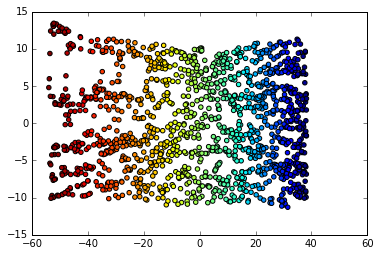

In [280]:
# 2D projection obtained using ISOMAP
figure()
scatter(Y[:,0], Y[:,1], c=color)

show()

### Local Linearity

- In general, Non-Linear methods try to preserve the local similarity or clustering of points while possibly making changes to the global position of points (moving the clusters around).

- An Idea: Do a different linear dimensionality reduction at each point (because locally a manifold looks linear) and then combine these with minimal discrepancy.

### Locally Linear Embedding (LLE) Algorithm - 1

- Input: $n \times q$ data matrix $X$, with rows $\overrightarrow{x}_i$; a desired number of dimensions $p < q$; and an integer $k$ for finding local neighborhoods where $k \geq q + 1$ 
- Construct the $k$-Nearest Neighbor graph.

### Locally Linear Embedding (LLE) Algorithm - 2

- Find the weight matrix $W$ which minimizes the residual sum of squares for reconstructing each $\overrightarrow{x}_i$ from it's neighbors, $RSS(W) = \sum \limits_{i = 1}^n \|\overrightarrow{x}_i - \sum \limits_{j \neq i} w_{ij} \overrightarrow{x}_j\|^2$ where $w_{ij} = 0$ unless $\overrightarrow{x}_j$ is one of $\overrightarrow{x}_i$'s $k$-Nearest Neighbors, and for each $i$, $\sum_j w_{ij} = 1$
- Find the coordinates $Y$ which minimize the reconstruction error using the weights, $Y = \sum \limits_{i = 1}^n \|\overrightarrow{y}_i - \sum \limits_{j \neq i} w_{ij} \overrightarrow{y}_j\|^2$ subject to $\sum_i Y_{ij} = 0$ for each $j$ and that $Y^TY = I$. 

(See Nonlinear Dimensionality Reduction I: Local Linear Embedding of CMU's 36-350 Data Mining Course for more details)

### Spectral Clustering

- Problem: Given ***unlabeled*** data $\mathbf{x}_1, ..., \mathbf{x}_n$, can one perform dimensionality reduction and find (possibly ***non-convex***) clusters?

- Yes! Spectral Clustering is a method for clustering that proceeds as follows: 
 - Construct a graph where the nodes are the datapoints and the edge weights reflect similarity.
 - Form an $n \times n$ matrix $L$ from the graph called the Laplacian.
 - Infer a partition from the spectral decomposition of $L$ (eigenvalues of $L$). 

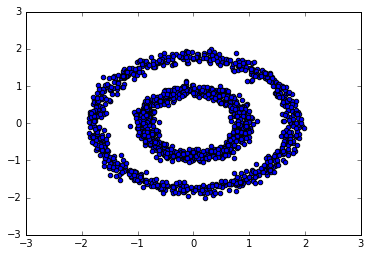

In [50]:
# Toy Data Set
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

X, y = noisy_circles
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])

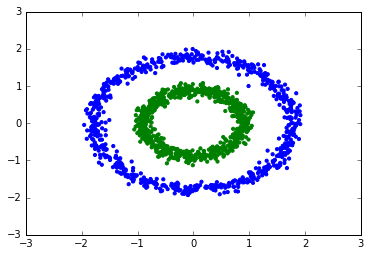

In [49]:
spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
spectral.fit(X)
y_pred = spectral.labels_.astype(np.int)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

### Graph Laplacians 

- The weighted degree of a node $\mathbf{x}_i$ is $d_i = \sum \limits_{j = 1}^n w_{ij}$

- The degree matrix is the diagonal matrix $D = \begin{bmatrix} d_1 & & & & \\ & d_2 & & & \\ & & . & & \\  & & & . & \\  & & & & d_n\\ \end{bmatrix}$

- The unnormalized graph Laplacian matrix is $L = D - W$ 

### Properties of Graph Laplacians

- For every $\mathbf{f} \in \mathbb{R}^n, \mathbf{f}^TL\mathbf{f} = \frac{1}{2} \sum_{i,j = 1}^n w_{ij} (f_i - f_j)^2$.

- $L$ is Symmetric and Positive Semi-Definite.

- The smallest eigenvalue of $L$ is 0, and $\underline{1} = [1 1 1 ... 1]^T \in \mathbb{R}^n$ is a corresponding eigenvector. 
 - Hence, $L$ has $n$ non-negative real valued eigenvalues $0 = \lambda_1 \leq \lambda_2 \leq ... \leq \lambda_n.$ 



### Proof (1)

$\begin{align}\mathbf{f}^TL\mathbf{f} &= \mathbf{f}^TD\mathbf{f} - \mathbf{f}^TW\mathbf{f}\\
                                         &= \sum \limits_{i = 1}^n d_i f_i^2 - \sum \limits_{i, j} w_{ij}f_if_j        \hspace{0.5em} (\because \text{ D is a diagonal matrix})\\
                                         &= \frac{1}{2}\left(\sum \limits_{i = 1}^n d_i f_i^2 - 2 \cdot \sum \limits_{i, j} w_{ij}f_if_j + \sum \limits_{i = 1}^n d_j f_j^2 \right)\\
                                         &= \frac{1}{2} \sum \limits_{i, j} w_{ij} (f_i^2 - 2f_if_j + f_j^2)\\
                                         &= \frac{1}{2} \sum \limits_{i, j} w_{ij} (f_i - f_j)^2 \blacksquare \\ 
                                         \end{align}$

### Proof (2)

- From the previous slide, we have that $\mathbf{f}^TL\mathbf{f} = \frac{1}{2} \sum \limits_{i, j} w_{ij} (f_i - f_j)^2$. With all $w_{ij}$ nonegative, we thus have that $L$ is PSD. 

- Now, $W$ is symmetric by definition of Similarity Graphs and $D$ is simply a diagonal matrix. Hence, $L$ is symmetric.

### Proof (3)

- Note that: $$L\underline{1} = D\underline{1} - W\underline{1} = \begin{bmatrix}0\\0\\.\\.\\.\\0\end{bmatrix} = 0 \cdot \underline{1}$$

- Now, we already have that $L$ is PSD. Therefore, 
 - The smallest eigenvalue of $L$ is 0, and,
 - $L$ has $n$ non-negative real valued eigenvalues $0 = \lambda_1 \leq \lambda_2 \leq ... \leq \lambda_n.$ 

### Why the Laplacian?

- $L$ encodes many properties of the similarity graph. What follows is one such interesting property for clustering.

- For $A \subseteq \{\mathbf{x}_1, ..., \mathbf{x}_n\}$, define the indicator vector $\mathbb{1}_A = \begin{bmatrix}f_1\\f_2\\.\\.\\.\\f_n\end{bmatrix}$ where $f_i = \begin{cases} 1 & \text{if } \mathbf{x}_i \in A\\ 0 & \text{if } \mathbf{x}_i \not \in A \end{cases}$

### Proposition

If the graph has connected components $A_1, ..., A_K$, then the nullspace of $L$ has dimension $k$ and is spanned by $\mathbb{1}_{A_1}, ..., \mathbb{1}_{A_K}$ 

### Proof (Case: K = 1)

- We have already established that $\underline{1} \in N(L)$.
- Suppose $\mathbf{f} \in N(L)$. Then $L\mathbf{f} = \underline{0}$.
- With $L\mathbf{f} = \underline{0}$, $\mathbf{f}^TL\mathbf{f} = \frac{1}{2} \sum \limits_{i, j} w_{ij} (f_i - f_j)^2 = 0$.
- If $\mathbf{x}_i$ and $\mathbf{x}_j$ are adjacent, then $w_{ij} > 0$ which implies $f_i = f_j$.
- More generally, since $K = 1$, and two points $\mathbf{x}_i$ and $\mathbf{x}_j$ are connected by a path, and therefore $f_i = f_j$. 
- Thus, all $f_i$ are equal to a constant, and therefore $\mathbf{f}$ is a multiple of $\underline{1}$.

### Proof (Case: K > 1)

- If $K > 1$, let us suppose that $L$ is block diagonal: $L = \begin{bmatrix}L_1 & & & & \\ & L_2 & & \huge{0} & \\ & & . & & \\ & \huge{0} & & . & \\ & & & & L_K \\ \end{bmatrix}$

- Notice that $L_k$ is the graph Laplacian of $A_k$.

### Proof (Case: K > 1)

- Now, applying the previous case,
 - $\forall k, L\mathbb{1}_{A_k} = 0$, and, 
 - If $L\mathbf{f} = 0$, then $\mathbf{f}$ is piecewise constant on each $A_k$. So, $$f = \sum_{k = 1}^K \alpha_k \mathbb{1}_{A_l}$$
 
 - Hence, in the case of $K > 1$, also, we have that $dim(N(L)) = K$ and $\{\mathbb{1}_{A_1}, ..., \mathbb{1}_{A_K}\}$ spans $N(L)$.

### Corollaries

- ***Restatement:*** The Graph Laplacian $L$ has as many eigenvalues 0 as there are connected components, and the corresponding eigenvectors are the indicator vectors of the connected components.

- If $\{u_1, ..., u_K\} \subset R^n$ is a basis of $N(L)$ and we define $\mathbf{y}_i = (u_1^{(i)}, ..., u_K^{(i)}) \in \mathbb{R}^K$ then $\mathbf{y}_i = \mathbf{y}_j$ iff. $\mathbf{x}_i$ and $\mathbf{x}_j$ are in the same connected component.

### Noise

- In practice, we cannot hope for the connected components to coincide with the clusters. Instead, we are more likely to have: $L = \begin{bmatrix}L_1 & & & & \\ & L_2 & & \huge{0} & \\ & & . & & \\ & \huge{0} & & . & \\ & & & & L_K \\ \end{bmatrix} + \begin{bmatrix}\Delta_{11} & . & . & . & \Delta_{1n}\\ . & & & & .\\ . & & & & .\\ . & & & & .\\ \Delta_{n1} & & & & \Delta_{nn} \\ \end{bmatrix} = L_{\text{ideal}} + \Delta$ 

- $\Delta$ accounts for the edges between nodes in different clusters.

### Noise and Matrix Perturbation Theory

- If the similarity graph "represents" similarity quite well, then the entries of $\Delta$ should be much smaller than the entries in $L$.

- Then, Matrix Perturbation Theory (loosely) tells us that the $K$ smallest eigenvalues should still be close to 0 and that the corresponding eigenvectors should still approximately span the nullspace of $L_{\text{ideal}}$. 

- This motivates the Spectral clustering algorithm.

### Spectral Clustering Algorithm

- Input: $\mathbf{x}_1, ..., \mathbf{x}_n$
- Construct a similarity graph and form the graph Laplacian $L$
- Determine $K$ smallest eigenvalues $0 = \lambda_1 \leq ... \leq \lambda_K$ of $L$ and corresponding eigenvectors $u_1, ..., u_K \in \mathbb{R}^n$
- Set $\mathbf{y}_i = (u_1^{(i)}, ..., u_K^{(i)}) \in \mathbb{R}^K, i = 1, ..., n$
- Cluster $\{y_i\}_{i = 1}^n$ using $k$-Means clustering, and assign $\{\mathbf{x}_i\}_{i = 1}^n$ to the corresponding clusters

### Non-Linear Dimensionality Reduction in Spectral Clustering

- The mapping $\mathbf{x}_i \rightarrow \mathbf{y}_i$ is actually a form of nonlinear dimensionality reduction such that a simple algorithm like $k$ Means is sufficient in the $\mathbf{y}_i$ space.

### Selecting K

As with other ML algorithms, there are model selection questions. One important question is "What $K$ should one choose?"

- General Idea: Look for jumps from "near-zero" eigenvalues to "non near-zero" eigenvalues.

In [262]:
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_classification
import numpy as np

def print_and_plot_eigvals(X):
    plt.figure()
    sigma = 0.7
    W = squareform(pdist(X, lambda u, v: np.exp(-1/(2 * sigma**2) * np.linalg.norm(u - v)**2)))
    D = np.array(W, copy=True)
    for i in range(len(D[0, :])):
        for j in range(len(D[:, 0])):
            if i != j:
                D[i][j] = 0
            if i == j:
                D[i][j] = sum(W[i])
    L = D - W
    plt.plot(sorted(np.linalg.eigvals(L))[:10], 'ro')
    print(sorted(np.linalg.eigvals(L))[:10])

[-1.2480683883100642e-14, 0.0013154052593018178, 0.0046053729811966091, 0.0050889334298137232, 0.014685749053724273, 0.027829914464489385, 0.028699836434436726, 0.048567977551889338, 0.061567754288057684, 0.063328564669519485]


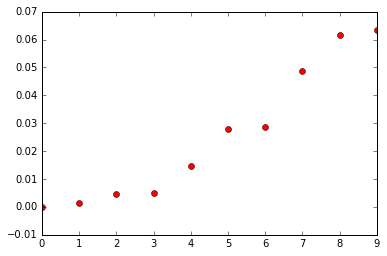

In [263]:
# Smallest 10 Eigenvalue plot when class separation is 100% 
# (True number of clusters = 4)
# Clear Jump after X = 3 (Note: There is a point at X = 0 as well)
X, y = make_classification(n_samples=500, n_features=5, n_repeated=0, 
                           n_clusters_per_class=1, n_informative=2, 
                           n_classes=4, n_redundant=0, class_sep=1.0, 
                           random_state=0)
print_and_plot_eigvals(X)
plt.show()

[-4.4323485853814404e-14, 0.0015176600400074848, 0.0032385514895425542, 0.0035720520857895313, 0.015783136243090218, 0.018439403087415793, 0.043666072976874609, 0.054049004708709152, 0.059524534836090083, 0.067149390997341726]


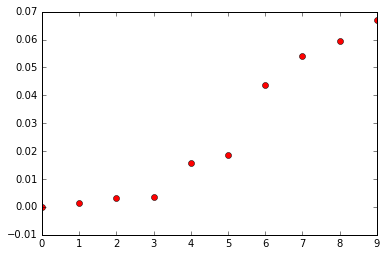

In [253]:
# Smallest 10 Eigenvalues plot when class separation is 80% 
# (True number of clusters = 4)
# Still a clear jump after 3
X, y = make_classification(n_samples=500, n_features=5, n_repeated=0, 
                           n_clusters_per_class=1, n_informative=2, n_classes=4, n_redundant=0, class_sep=0.8,
                           random_state=0)
print_and_plot_eigvals(X)
plt.show()

[-3.6787746607324487e-14, 0.0022593679927678835, 0.002461180941150849, 0.002751372213581728, 0.010051613505815018, 0.019769337355103521, 0.02527848614330876, 0.029992375656427296, 0.048942522517840009, 0.074495579306467621]


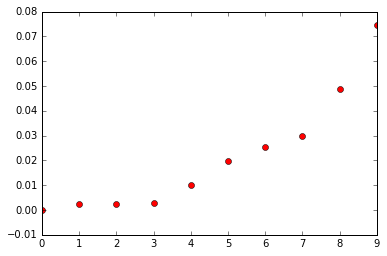

In [254]:
# Smallest 10 Eigenvalues plot when class separation is 60% 
# (True number of clusters = 4)
# Still a clear jump, but the difference in the fourth (at X = 3) 
# and fifth smallest eigenvalue (at X = 3) has shrunk
X, y = make_classification(n_samples=500, n_features=5, n_repeated=0, 
                           n_clusters_per_class=1, n_informative=2, n_classes=4, n_redundant=0, class_sep=0.6, 
                           random_state=0)
print_and_plot_eigvals(X)
plt.show()

[3.6943286537082723e-15, 0.0016400912820872539, 0.002414722633753997, 0.0054784078496818668, 0.0060028531162442172, 0.010697275660381369, 0.016587206558126472, 0.03904770713257219, 0.046458673238460188, 0.079105763343638627]


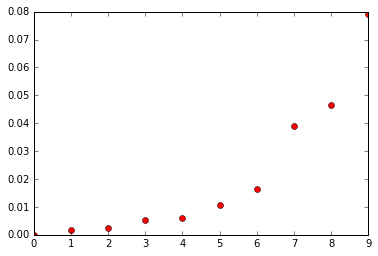

In [255]:
# Smallest 10 Eigenvalues plot when class separation is 40% 
# (True number of clusters = 4)
# Jump after 3 is no longer apparent
X, y = make_classification(n_samples=500, n_features=5, n_repeated=0, 
                           n_clusters_per_class=1, n_informative=2, 
                           n_classes=4, n_redundant=0, class_sep=0.4,
                           random_state=0)
print_and_plot_eigvals(X)
plt.show()

[-2.8199664825478976e-14, 0.0010473234762867856, 0.0026418264237211076, 0.0027839525460946883, 0.0087151042403223918, 0.016010365116325566, 0.026020085111815281, 0.045512105195383262, 0.065963140031332607, 0.076009511201620389]


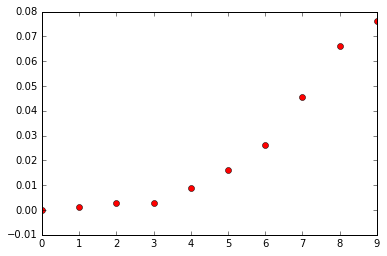

In [282]:
# Smallest 10 Eigenvalues plot when class separation is 20% 
# (True number of clusters = 4)
# Due to possibly some of the noise, there is a jump after 3 
# (even with only 20% class separation). However, it is still
# arguably less clear than before.
X, y = make_classification(n_samples=500, n_features=5, n_repeated=0, 
                           n_clusters_per_class=1, n_informative=2, n_classes=4, n_redundant=0, class_sep=0.2,
                           random_state=0)
print_and_plot_eigvals(X)
plt.show()

[-4.2858595610691382e-14, 0.0010045604206438056, 0.0025103820796914312, 0.0040642182708937272, 0.0067710908172069692, 0.030220091674211681, 0.045248493787963542, 0.047897795859245147, 0.066606838908050858, 0.070156508174219145]


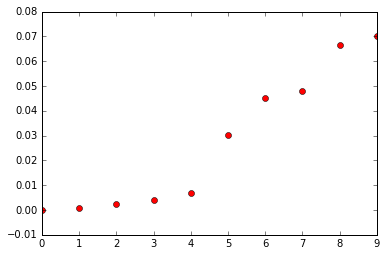

In [271]:
# Smallest 10 Eigenvalues plot when class separation is 5% 
# (True number of clusters = 4)
# Incorrect model selection would be done in this case 
# (K = 5 instead of K = 4)
X, y = make_classification(n_samples=500, n_features=5, n_repeated=0, 
                           n_clusters_per_class=1, n_informative=2, 
                           n_classes=4, n_redundant=0, class_sep=0.05,
                           random_state=0)
print_and_plot_eigvals(X)
plt.show()

### Another perspective: Graph Cuts

- Given a similarity graph, we would like to find $A_1, ..., A_K$ of $\{\mathbf{x}_1, ..., \mathbf{x}_n\}$ such that 
 - $w_{ij}$ large if $\mathbf{x}_i, \mathbf{x}_j$ are in the same cluster, and, 
 - $w_{ij}$ small if $\mathbf{x}_i, \mathbf{x}_j$ are in different clusters.
 
- We can approach this problem directly by trying to solve the MinCut problem, which tries to minimize $$Cut(A_1, ..., A_K) = \frac{1}{2}\sum \limits_{k = 1}^K w(A_K, \overline{A}_K)$$ where $w(A, B) = \sum \limits_{i \in A} \sum \limits_{j \in B} w_{ij}$ and $\overline{A}$ is the complement of $A$.

### Problem with MinCut and RatioCut

- MinCut leads to small and often singleton clusters.

- One of the modifications that have been proposed (Hagen and Kahng, 1992): $$\text{RatioCut}(A_1, ..., A_K) = \frac{1}{2} \sum \limits_{k = 1}^K \frac{w(A_k, \overline{A}_k)}{|A_k|}$$ where $|A|$ is the number of nodes in $A$.

- However, introducing the "balancing" term makes the problem NP-hard.

### Approximating RatioCut, Case of K = 2

- We wish to solve $\min \limits_{A \subset V} \text{RatioCut}(A, \overline{A}) = \min \limits_{A \subset V} \left[\frac{\text{Cut}(A, \overline{A})}{|A|} + \frac{\text{Cut}(A, \overline{A})}{|\overline{A}|}\right]$ (Note: $V$ is now a set that represents the data)

- Define the vector $f = (f_1, ..., f_n)^T \in \mathbb{R}^n$ with entries $$f_i = \begin{cases} \sqrt{\frac{|\overline{A}|}{|A|}} & \text{if } \mathbf{x}_i \in A\\ -\sqrt{\frac{|A|}{|\overline{A}|}} & \text{if } \mathbf{x}_i \in \overline{A}\end{cases}$$

- Then, $f^TLf = |V| \cdot \text{RatioCut}(A, \overline{A})$.

### Proof
$\begin{align} f^TLf &= \frac{1}{2}\sum \limits_{i, j = 1}^n w_{ij}(f_i - f_j)^2\\
                     &= \frac{1}{2}\sum \limits_{i \in A, j \in \overline{A}} w_{ij}\left(\sqrt{\frac{|\overline{A}|}{|A|}} + \sqrt{\frac{|A|}{|\overline{A}|}}\right)^2 +\\ & \hspace{1.2em} \frac{1}{2}\sum \limits_{i \in \overline{A}, j \in A} w_{ij}\left(-\sqrt{\frac{|\overline{A}|}{|A|}} - \sqrt{\frac{|A|}{|\overline{A}|}}\right)^2\\ 
                     &= cut(A, \overline{A})\left(\frac{|\overline{A}|}{|A|} + \frac{|A|}{|\overline{A}|} + 2\right)\\ \end{align}$

### Proof (2)

$\begin{align} f^TLf  &= cut(A, \overline{A})\left(\frac{|\overline{A}|}{|A|} + \frac{|A|}{|\overline{A}|} + 2\right)\\
                      &= cut(A, \overline{A})\left(\frac{|A| + |\overline{A}|}{|A|} + \frac{|A| + |\overline{A}|}{|\overline{A}|}\right)\\
                     &= |V| \cdot \text{RatioCut}(A, \overline{A})\end{align}$

### Further Facts (1)

$\begin{align}\sum \limits_{i = 1}^n f_i &= \sum \limits_{i \in A} \sqrt{\frac{|\overline{A}|}{|A|}} - \sum \limits_{i \in \overline{A}} \sqrt{\frac{|A|}{|\overline{A}|}}\\ &= |A|\sqrt{\frac{|\overline{A}|}{|A|}} - |\overline{A}|\sqrt{\frac{|A|}{|\overline{A}|}}\\ &= 0\end{align}$

### Further Facts (2) 
    
$\begin{align}\|\mathbf{f}\|^2 &=  \sum \limits_{i = 1}^n f_i^2\\ &= |A|\frac{|\overline{A}|}{|A|} + |\overline{A}|\frac{|A|}{|\overline{A}|}\\ &= |\overline{A}| + |A|\\ &= |V|\\ &= n\end{align}$

### RatioCut Combinatorial Optimization Problem 

- From the previous facts, RatioCut can be written as the following optimization problem: 
    $$\min \limits_{A \subset V} \mathbf{f}^TL\mathbf{f} \text{ s.t. } \mathbf{f} \perp \mathbb{1}, \|\mathbf{f}\| = \sqrt{n}$$
- The above is a discrete optimization problem as the entries of $\mathbf{f}$ are constrained to take only two particular values and therefore is NP-hard. A relaxation can be used.

### Relaxed RatioCut

An intuitive relaxation to RatioCut with the discrete optimization removed is given by 

$$\min \limits_{f \in \mathbb{R}^n} \mathbf{f}^TL\mathbf{f} \text{ s.t. } \mathbf{f} \perp \mathbb{1}, \|\mathbf{f}\| = \sqrt{n}$$

### Solution to Relaxed RatioCut (Case K = 2)

The solution to the relaxed RatioCut defined previously for the case K = 2 is given by the ***eigenvector*** corresponding to the ***second smallest eigenvalue***. This uses a simple fact about the Rayleigh Quotient (see Matrix Compuations by G.H. Golub and C.F. Van Loan for a proof): 

- Let $A$ be a real symmetric matrix. 
- Under the constraint that $\mathbf{x}$ is orthogonal to the $j - 1$ smallest eigenvectors $\mathbf{u}_1, ..., \mathbf{u}_{j - 1}$,
- the quotient $\frac{\mathbf{x}^TAx}{\mathbf{x}^T\mathbf{x}}$ is minimized by 
- the next smallest eigenvector $\mathbf{u}_j$, and,
- it's minimum value corresponds to the eigenvalue $\lambda_j$.

### Relaxed RatioCut and Spectral Clustering

- To recover a solution to RatioCut, we can form $y_i = (1, f_i)$, and,
- cluster these using $k$-Means. 

- These clusters determine the estimate of A.
- Therefore, the relaxation of RatioCut is solved by Spectral Clustering.

A similar analysis applies for K > 2 (see A Tutorial on Spectral Clustering by Ulrike Von Luxberg) and we can thus see that Relaxed RatioCut in general is solved by Spectral Clustering.

### An Important Note

The gap between the optimal value of RatioCut and the optimal value of it's relaxation can be ***arbitrarily large!***

### Normalized Laplacians

- Different "Normalized" Laplacians have been proposed. These include: 
 - $L_{\text{sym}} = D^{-1/2}LD^{-1/2} = I - D^{-1/2}WD^{-1/2}$ ("sym": symmetric)
 - $L_{\text{rw}} = D^{-1}L = I - D^{-1}W$ ("rw": random walk)

### Why Normalized Laplacians? 

Chung pointed out in Spectral Graph Theory, 1997, that
- The eigenvalues of the normalized laplacians are in a "normalized" form, and, 
- the spectra of the normalized Laplacians relate well to other graph invariants for general graphs in a way that unnormalized Laplacians don't.
- The eigenvalues of Normalized Laplacians are consistent with the eigenvalues in spectral geometry and stochastic processes.

### Properties of $L_{\text{sym}}$ 
(Note: Proofs of these are left as an excercise. However, they are very similar to the ones given before for the unnormalized case.)


- $\forall \mathbf{f} \in \mathbb{R}^n, \mathbf{f}^TL\mathbf{f} = \frac{1}{2}\sum \limits_{i,j = 1}^n w_{ij} \left(\frac{f_i}{\sqrt{d_i}} - \frac{f_j}{\sqrt{d_j}}\right)^2$
- 0 is an eigenvalue of $L_{\text{sym}}$ with corresponding eigenvector $D^{1/2}\mathbb{1}$.
- If the similarity graph has $K$ connected components $A_1, ..., A_k$, then, $\mathbb{1}_{A_1}, ..., \mathbb{1}_{A_K}$ is a basis of $N(L_{\text{sym}})$.
- $L_{\text{sym}}$ is symmetric positive semidefinite with $n$ non-negative real values eigenvalues $0 = \lambda_1 \leq ,,, \leq \lambda_n$.

### Properties of $L_{\text{rw}}$
(Note: Proofs of these are left as an excercise. However, they are very similar to the ones given before for the unnormalized case.)


- $\lambda$ is an eigenvalue of $L_{\text{rw}}$ with corresponding eigenvector $\mathbf{u}$ iff. $\lambda$ and $u$ solve the generalized eigen-problem $L\mathbf{u} = \lambda D \mathbf{u}$
- 0 is an eigenvalue of $L_{\text{rw}}$ with corresponding eigenvector $\mathbb{1}$.
- If the similarity graph has $K$ connected components $A_1, ..., A_k$, then, $\mathbb{1}_{A_1}, ..., \mathbb{1}_{A_K}$ is a basis of $N(L_{\text{rw}})$.
- $L_{\text{rw}}$ is positive semidefinite with $n$ non-negative real values eigenvalues $0 = \lambda_1 \leq ,,, \leq \lambda_n$.


- "Connection" between the two: $\lambda$ is an eigevalue of $L_{\text{rw}}$ with eigenvector $\mathbf{u}$ iff. $\lambda$ is an eigenvalue of $L_{\text{sym}}$ with eigenvector $\mathbf{v} = D^{1/2}\mathbf{u}$

### Random Walks Point of View

- A random walk on a graph is a stochastic process which randomly jumps from vertex to vertex.
- Formally, the transition probability of jumping in one step from vertex $v_i$ to vertex $v_j$ is proportional to the edge weight $w_{ij}$ and is given by $p_{ij} = w_{ij}/d_{i}$. The transition matrix $P = (p_{ij}) i,j = 1, ..., n$ of the random walk is thus defined by
$$P = D^{−1}W$$

### Clustering, $L_{\text{rw}}$, and Random Walks

- If the graph is connected and non-bipartite, then the random walk always possesses a unique stationary distribution $\pi = (\pi_1, . . . , \pi_n)^T$, where $\pi_i = d_i/vol(V)$ and $vol(V) = \sum \limits_{i \in V} d_i$.

- There is a relationship between $L_{\text{rw}}$ and $P$, as $L_{\text{rw}} = I − P$. As a consequence, $\lambda$ is an eigenvalue of $L_{\text{rw}}$ with eigenvector $\mathbf{u}$ iff. $1 − \lambda$ is an eigenvalue of $P$ with eigenvector $\mathbf{u}$.

- Now, it is well known that many properties of a graph can be expressed in terms of the corresponding random walk transition matrix P, see Lovasz (1993) for an overview. 

- From this point of view it does not come as a surprise that the largest eigenvectors of P and the smallest eigenvectors of $L_{\text{rw}}$ can be used to describe cluster properties of the graph.

### Normalized Cut (NCut)

- Another Graph Cut take on Spectral Clustering.
- Normalized Cut (Shi and Malik, 2000): 
 $$\text{NCut}(A_1, ..., A_K) = \frac{1}{2} \sum \limits_{k = 1}^K  \frac{w(A_k, \overline{A}_k)}{vol(A_k)} \text{ where } w(A, B) = \sum \limits_{i \in A} \sum \limits_{j \in B} w_{ij} \text{ and } vol(A) = \sum \limits_{i \in A} \sum \limits_{j \in v} w_{ij}$$
- A formal equivalence between Ncut and the transition probabilities of the random walk has been observed in Meila and Shi (2001).

### Normalized Spectral Clustering according to Shi and Malik (2000) - 1
- Input: Similarity matrix $S \in \mathbf{R}^{n \times n}$, number $K$ of clusters to construct.
- Construct a similarity graph. Compute the unnormalized Laplacian L.
- Compute the first $K$ generalized eigenvectors $\mathbf{u}_1, . . . , \mathbf{u}_k$ of the generalized eigen-problem $L\mathbf{u} = \lambda D \mathbf{u}$.
- Let $U \in \mathbb{R}^{n \times K}$ be the matrix containing the vectors $\mathbf{u}_1 , . . . , \mathbf{u}_K$ as columns.

### Normalized Spectral Clustering according to Shi and Malik (2000) - 2
- For $i = 1, ..., n$, let $y_i \in \mathbb{R}^K$ be the vector corresponding to the $i^\text{th}$ row of $U$.
- Cluster the points $(y_i)_{i = 1, ..., n}$ in $\mathbb{R}^k$ with the $k$-means algorithm into clusters
$C_1, ..., C_k$.
- Output: Clusters $A_1,...,A_k$ with $A_i = \{j | y_j \in C_i\}$.

### Normalized Spectral Clustering according to  Ng, Jordan, and Weiss (2002) - 1
- Input: Similarity matrix $S \in \mathbf{R}^{n \times n}$, number $K$ of clusters to construct.
- Construct a similarity graph. Compute the normalized Laplacian $L_{\text{sym}}$.
- Compute the first $K$ eigenvectors $\mathbf{u}_1, . . . , \mathbf{u}_k$ of $L_{\text{sym}}$. 
- Let $U \in \mathbb{R}^{n \times K}$ be the matrix containing the vectors $\mathbf{u}_1 , . . . , \mathbf{u}_K$ as columns.

### Normalized Spectral Clustering according to  Ng, Jordan, and Weiss (2002) - 2
- Form the matrix $T \in \mathbb{R}^{n \times k}$ from $U$ by normalizing the rows to norm 1, that is set $t_{ij} = \frac{u_{ij}}{(\sum \limits_􏰅k u^2_{ik})^{1/2}}$. 
- For $i = 1, ..., n$, let $y_i \in \mathbb{R}^K$ be the vector corresponding to the $i^\text{th}$ row of $T$.
- Cluster the points $(y_i)_{i = 1, ..., n}$ with the $k$-means algorithm into clusters $C_1, . . . , C_k$.
- Output: Clusters $A_1, ..., A_k$ with $A_i = \{j | y_j \in C_i\}$.

### Final Thoughts: Which similarity measure to use?
(From "A Tutorial on Spectral Clustering" by Ulrike von Luxberg)

- Start with k-Nearest Neighbors 
 - Simple to work with. 
 - Results in a sparse adjacency matrix W.
 - Less vulnerable to unsuitable choices of parameters than the other graphs.

### Final Thoughts: What parameters to choose? ($\epsilon$)
(From "A Tutorial on Spectral Clustering" by Ulrike von Luxberg)


Not much is known theoretically about what choices to make for parameters (most results only apply as the sample size $n \rightarrow \infty$).

 - Some heuristics for $\epsilon$: 
  - Choose $\epsilon$ such that the resulting graph is safely connected. 
  - In other words, the length of the longest edge in a minimal spanning tree of the fully connected graph on the data points.
  - Watch out for outliers!

### Final Thoughts: What parameters to choose? ($\sigma$)
(From "A Tutorial on Spectral Clustering" by Ulrike von Luxberg)

- Some heuristics for $\sigma$:
  - Choose $\sigma$ in the order of the mean distance of a point to its $k^\text{th}$ nearest neighbor.
  - Another way is to determine $\epsilon$ by the minimal spanning tree heuristic described above, and then choose $\sigma = \epsilon$.

### Final Thoughts: Which Graph Laplacian to use?
(From "A Tutorial on Spectral Clustering" by Ulrike von Luxberg)

- Before deciding this question, one should always look at the degree distribution of the similarity graph.
- If the graph is very regular and most vertices have approximately the same degree, then all the Laplacians are very similar to each other, and will work equally well for clustering.
- However, if the degrees in the graph are very broadly distributed, then the Laplacians differ considerably.
- Reccomendation: Use $L_{\text{rw}}$. 
 - Various arguments can be put forth for this. See the above cited work for more details.